In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import umap
from collections import Counter
'''
loading IDRome data
'''
idrome_df = pd.read_excel('data_source/data_collection/IDRome_idrs.xlsx')


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
''' 
precomputed embedding by each method
'''
esm8m_320dim_embedding = np.load('data_processed/idr_conformation/idrome_idrs_esm2_8_320dim_embedding.npy')
albatross_330dim_embedding = np.load('data_processed/idr_conformation/idrome_idrs_albatross_330dim_embedding.npy')
word2vec_100dim_embedding = np.load('data_processed/idr_conformation/idrome_idrs_protvec_100dim_embedding.npy')
ef_52dim_embedding = np.load('data_processed/idr_conformation/idrome_idrs_psap_52dim_embedding.npy')



In [3]:

def get_nu_label(nu_value): ### label for coloring umap
    if nu_value < 0.5:
        return 0
    elif nu_value >= 0.5 and nu_value < 0.55:
        return 1
    else:
        return 2
idr_df = idrome_df.copy()
idr_df['compact_group'] = idr_df['nu'].apply(lambda x:get_nu_label(x))
''' 
extremely compact: nu < 0.45
extremely expanded: nu >= 0.6
'''
idr_df_extrem = idr_df[(idr_df['nu']<0.45)|(idr_df['nu']>=0.6)]
idr_df_compact,idr_df_extend = idr_df_extrem[idr_df_extrem['nu']<0.45],idr_df_extrem[idr_df_extrem['nu']>=0.6]
idr_df = idr_df_extrem.copy()
print(Counter(idr_df['compact_group'].values))
idr_df_selected_idx = idr_df.index

Counter({0: 599, 2: 469})


(1068, 320) 1068


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


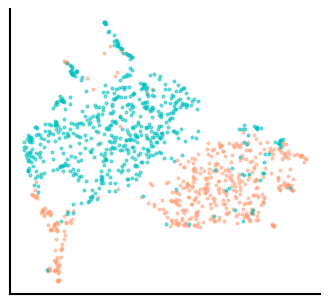

(1068, 330) 1068


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


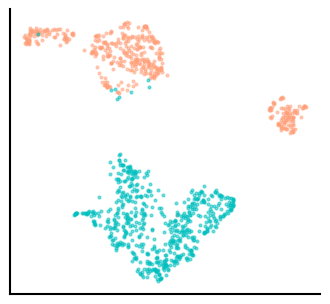

(1068, 100) 1068


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


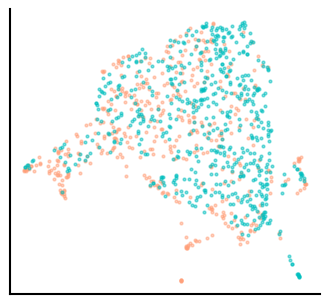

(1068, 52) 1068


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


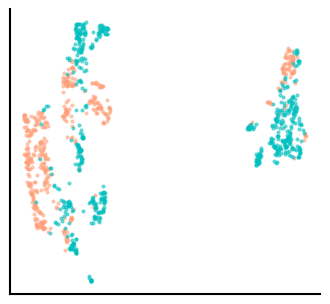

In [4]:
''' 
graph for Nu
'''
for test_embedding in [
    esm8m_320dim_embedding, # esm 320-dim embedding
    albatross_330dim_embedding, # idr conformational embedding
    word2vec_100dim_embedding, ## word2vec embedding
    ef_52dim_embedding ## engineered features
    ]:  
    test_embedding = test_embedding[idr_df_selected_idx]
    data = test_embedding.copy()
    labels = idr_df['compact_group'].values 
    print(data.shape,len(labels))
    umap_model = umap.UMAP(n_components=2, random_state=42)
    data_umap = umap_model.fit_transform(data)
    fig = plt.figure(figsize=(4,3.7))
    ax = fig.add_subplot(111)  # 添加一个二维轴
    ax.scatter(data_umap[labels == 2, 0], data_umap[labels == 2, 1],label='extend IDR', alpha=0.5,s=4,c='lightsalmon')
    ax.scatter(data_umap[labels == 0, 0], data_umap[labels == 0, 1],label='dense IDR', alpha=0.5,s=4,c='c')
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()

In [5]:
''' 
Sconf/N
'''
def get_spr_label(spr_value):
    if spr_value < 10.141:
        return 0
    else:
        return 2
idr_df = idrome_df.copy()
idr_df['compact_group'] = idr_df['SPR'].apply(lambda x:get_spr_label(x))
idr_df_extrem = idr_df[(idr_df['SPR']<10)|(idr_df['SPR']>=10.25)]
'''
compact: SPR < 10
expanded: SPR >= 10.25
'''
idr_df = idr_df_extrem.copy()
print(Counter(idr_df['compact_group'].values))
idr_df_selected_idx = idr_df.index

Counter({2: 7019, 0: 4412})


(11431, 320) 11431


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


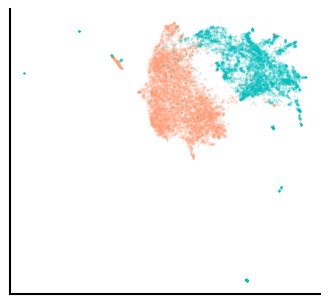

(11431, 330) 11431


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


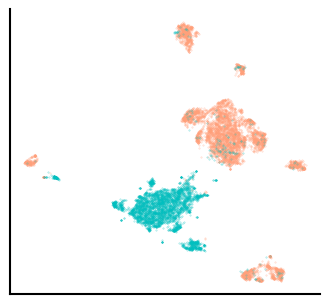

(11431, 100) 11431


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


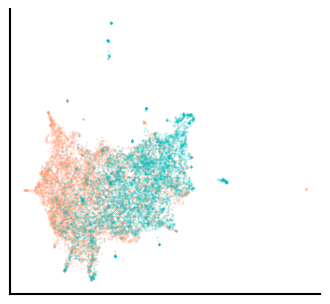

(11431, 52) 11431


/home/von/anaconda3/envs/pstp/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


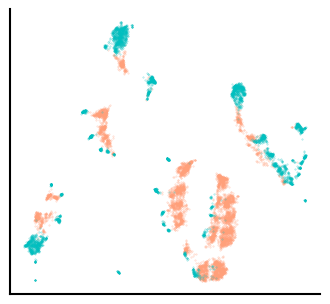

In [6]:
''' 
graph for Spr
'''
for test_embedding in [
    esm8m_320dim_embedding, # esm 320-dim embedding
    albatross_330dim_embedding, # idr conformational embedding
    word2vec_100dim_embedding, ## word2vec embedding
    ef_52dim_embedding ## engineered features
    ]:  
    test_embedding = test_embedding[idr_df_selected_idx]
    data = test_embedding.copy()
    labels = idr_df['compact_group'].values 
    print(data.shape,len(labels))
    umap_model = umap.UMAP(n_components=2, random_state=42)
    data_umap = umap_model.fit_transform(data)
    fig = plt.figure(figsize=(4,3.7))
    ax = fig.add_subplot(111)  # 添加一个二维轴
    ax.scatter(data_umap[labels == 2, 0], data_umap[labels == 2, 1],label='extend IDR', alpha=0.5,s=0.1,c='lightsalmon')
    ax.scatter(data_umap[labels == 0, 0], data_umap[labels == 0, 1],label='dense IDR', alpha=0.5,s=0.1,c='c')
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()